# 基本的な画像処理

## 3.1 画像の差分

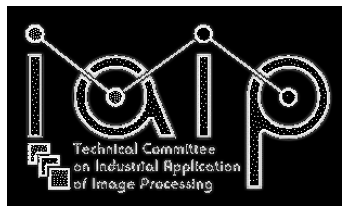

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
blured = cv2.GaussianBlur(gimg, (5,5), 3)
dst = gimg - blured
plt.imshow(dst, cmap='gray')
plt.axis(False);

差分はsignedにした方が見やすい

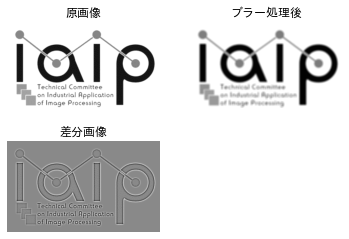

In [3]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # この一行を追記する

gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.subplot(2,2,1)
plt.imshow(gimg, cmap='gray')
plt.axis(False);
plt.title('原画像')
blured = cv2.GaussianBlur(gimg, (5,5), 3)
plt.subplot(2,2,2)
plt.imshow(blured, cmap='gray')
plt.axis(False);
plt.title('ブラー処理後')
# 負値も含むのでfloat32にしてしまった方が扱いやすい
dst = np.float32(gimg)- np.float32(blured)
# グレーが0レベル
plt.subplot(2,2,3)
plt.imshow(dst, cmap='gray')
plt.axis(False);
plt.title('差分画像');

カラー画像も同様に差分がとれる

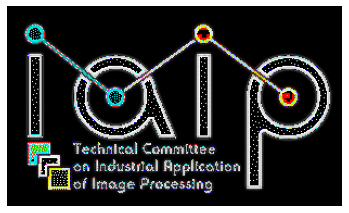

In [4]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
cimg = cv2.imread('sample.png')
blured = cv2.GaussianBlur(cimg, (5,5), 3)
dst = cimg-blured
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis(False);

動画像でのフレーム間差分表示の例。コールバック関数であるanimate_func内では原則ローカル変数が優先されるので
```Python
global tmp2
```
としてtmp2がグローバル変数であることを明示する必要がある。

In [ ]:
%matplotlib nbagg
# matplotlib inlineと同居しているので，うまく表示されない場合は繰り返し実行してみる
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
cap = cv2.VideoCapture(0)
ret = False
while (not(ret)):
    ret, capimg = cap.read()
tmp2 = cv2.resize(cv2.cvtColor(capimg, cv2.COLOR_RGB2GRAY),
                 dsize=None, fx=1/10.0, fy=1/10.0, interpolation=cv2.INTER_NEAREST)
fig = plt.figure()
im = plt.imshow(np.float32(tmp2), cmap='gray', vmin=-255, vmax=255)
def animate_func(i):
    ret, capimg = cap.read()
    global tmp2
    tmp = cv2.resize(cv2.cvtColor(capimg, cv2.COLOR_RGB2GRAY),
                     dsize=None, fx=1/10.0, fy=1/10.0, interpolation=cv2.INTER_NEAREST)
    dst = (np.float32(tmp2) - np.float32(tmp))
    im.set_data(dst)
    tmp2 = tmp.copy()
    return im,
anim = FuncAnimation(fig, animate_func, interval=50, frames=range(50), blit=True, repeat=False)
plt.show()


In [14]:
cap.release()

## 3.2 二値化処理
(画像処理100本ノックのQ.3)

NumPyのndarrayでの条件式による抽出を使う方法

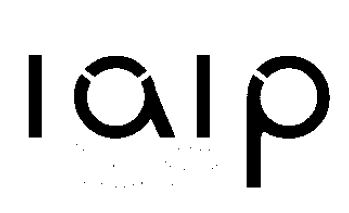

In [15]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
dst = gimg.copy()
dst[dst > 100] = 255
dst[dst <= 100] = 0
plt.imshow(dst, cmap='gray')
plt.axis(False);

条件を反転させたい場合はimg自体を255との差分の結果とすれば可能だが，ややこしいのでOpenCVの関数を使った方が良い

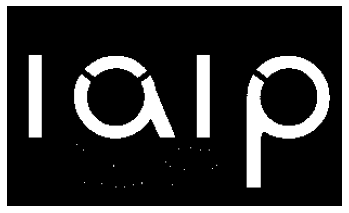

In [16]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
th, dst = cv2.threshold(gimg, thresh=100, maxval=255, type=cv2.THRESH_BINARY_INV)
plt.imshow(dst, cmap='gray')
plt.axis(False);

大津の法による閾値決定法も利用でき， 第一返り値に決定した閾値が代入される。

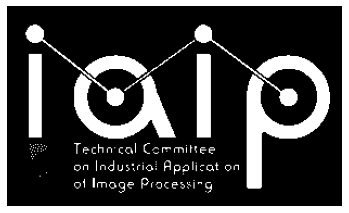

In [17]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
th, dst = cv2.threshold(gimg, thresh=-1, maxval=255, type=cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(dst, cmap='gray')
plt.axis(False);

特定の色の画素だけ取り出す例。ここでは赤い画素=赤チャネルでは値が大きく，他のチャネルの画素値が低いという条件になる。

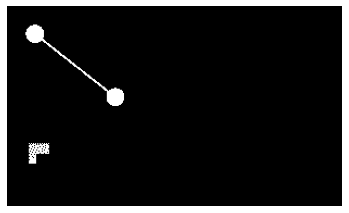

In [18]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
cimg = cv2.imread('sample.png')
dst = np.zeros(cimg.shape[:-1], dtype=np.uint8)
b, g, r = cv2.split(cimg)
# Greenで128より小さい画素が白
th, g = cv2.threshold(g, 128, maxval=255, type=cv2.THRESH_BINARY_INV)
# Redで128より大きい画素が白
th, r = cv2.threshold(r, 128, maxval=255, type=cv2.THRESH_BINARY)
dst = cv2.bitwise_and(r,g)
plt.imshow(dst, cmap='gray')
plt.axis(False);

## 3.3 モルフォロジー処理


(画像処理100本ノックのQ. 47-53)

Dilate(膨張)とErode(収縮)の例。getStructuringElementで取得できるのはMORPH_CROSS(十字)とMORPH_ELLIPSE(楕円)もある。

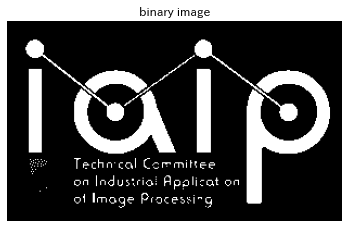

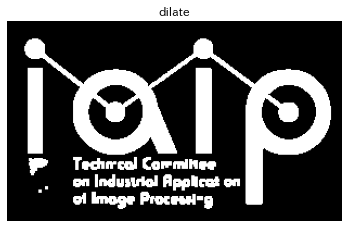

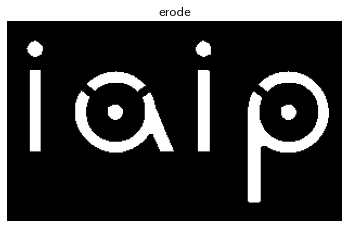

In [19]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
th, bimg = cv2.threshold(gimg, thresh=-1, maxval=255, type=cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure()
plt.imshow(bimg, cmap='gray')
plt.title('binary image')
plt.axis(False);
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dst = cv2.dilate(bimg, kernel=SE)
plt.figure()
plt.imshow(dst, cmap='gray')
plt.title('dilate');
plt.axis(False);
dst = cv2.erode(bimg, kernel=SE)
plt.figure()
plt.imshow(dst, cmap='gray')
plt.title('erode');
plt.axis(False);

オープニングとクロージングの例。SEの形状によって突端部の結果が変わってくる。

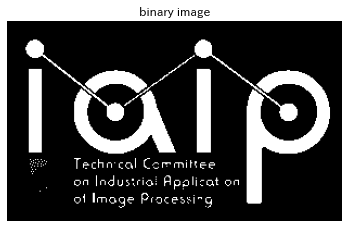

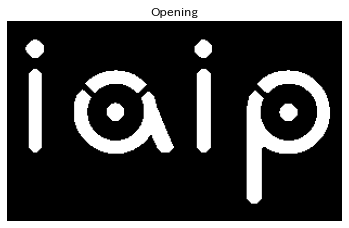

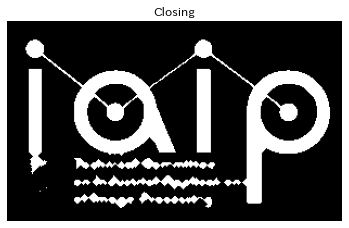

In [20]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
N=4
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
th, bimg = cv2.threshold(gimg, thresh=-1, maxval=255, type=cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure()
plt.imshow(bimg, cmap='gray')
plt.title('binary image')
plt.axis(False);
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
dst = cv2.morphologyEx(bimg, op=cv2.MORPH_OPEN, kernel=SE, iterations=N)
plt.figure()
plt.imshow(dst, cmap='gray')
plt.title('Opening')
plt.axis(False);
dst = cv2.morphologyEx(bimg, op=cv2.MORPH_CLOSE, kernel=SE, iterations=N)
plt.figure()
plt.imshow(dst, cmap='gray')
plt.title('Closing');
plt.axis(False);


## 3.4 エッジ抽出
(画像処理100本ノックのQ.16, Q.41-43)

Sobelフィルタの例

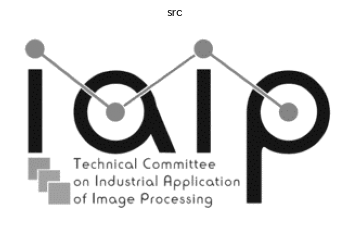

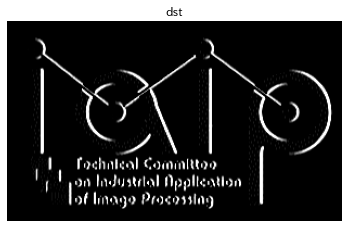

In [21]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(gimg, cmap='gray')
plt.title('src')
plt.axis(False);

dst = cv2.Sobel(gimg,ddepth=cv2.CV_8U, dx=1, dy=0, ksize=3)
plt.figure()
plt.imshow(dst, cmap='gray')
plt.title('dst')
plt.axis(False);


Cannyのエッジ抽出の例。

OpenCVではCanny関数で2段階の閾値とSobelフィルタのkernelサイズ(apertureSize)を指定するだけで良い。

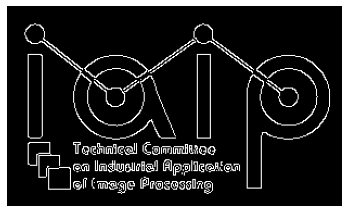

In [22]:
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.Canny(gimg, threshold1=100, threshold2=200,apertureSize=3)
plt.imshow(dst, cmap='gray')
plt.axis(False);


Zero crossingを見付けるのは結構面倒で，LoGフィルタの結果で値が0かつ近傍(ここでは3x3画素)が全て0ではない領域となる。OpenCVの場合LoGフィルタはLaplacianフィルタとGaussianフィルタを組合せれば良いというスタンスと思われるが，ここではSciPyのgaussian_laplaceを使う。

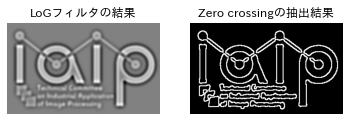

In [23]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_laplace
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
# SciPyのLoGを使う。出力はsignedにする
logimg = gaussian_laplace(gimg, sigma=3, output=np.float32)
# Morphological Processingの膨張処理と収縮処理をそれぞれ最大値フィルタ，最小値フィルタとして使う
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
logimg_max = cv2.dilate(logimg, kernel=SE)
logimg_min = cv2.erode(logimg, kernel=SE)
zc = ( (logimg >= 0)& (logimg_min < 0) ) | ( (logimg <= 0)& (logimg_max > 0))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(logimg, cmap='gray')
plt.title('LoGフィルタの結果')
plt.axis(False);
plt.subplot(1,2,2)
plt.imshow(zc, cmap='gray')
plt.title('Zero crossingの抽出結果');
plt.axis(False);


## 3.5 テンプレートマッチング
(画像処理100本ノック Q.54-57)

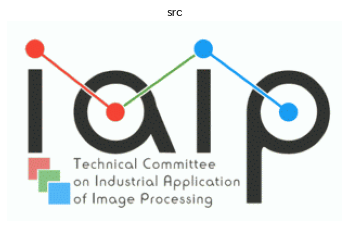

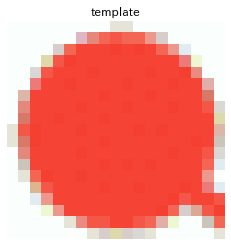

In [25]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
#かんたん
cimg = cv2.imread('sample.png')
template = cimg[16:35, 16:35, :].copy()
#原画像と別途撮影したテンプレート
#cimg = cv2.imread('Calc_s.jpg')
#template = cv2.imread('CalcO5_s.jpg')

plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.title('src')
plt.axis(False);

plt.figure()
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title('template');
plt.axis(False);


OpenCVで利用できるのはSSD(ここでは正規化した方のTM_SQDIFF_NORMED)とNCC(TM_CCORR_NORMED)， ZNCC(TM_CCOEFF_NORMED)で単純なユーリッド距離となるSSDよりZNCCの方が良い。

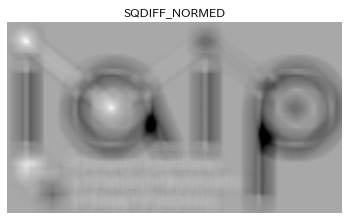

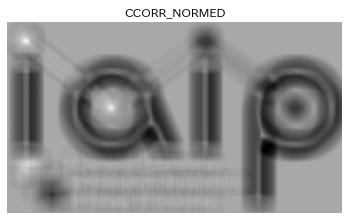

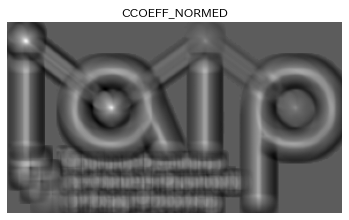

In [26]:
res_SQDIFF_N = cv2.matchTemplate(cimg, template, cv2.TM_SQDIFF_NORMED)
res_CCORR_N = cv2.matchTemplate(cimg, template, cv2.TM_CCORR_NORMED)
res_CCOEFF_N = cv2.matchTemplate(cimg, template, cv2.TM_CCOEFF_NORMED)
plt.figure()
plt.imshow(1.0-res_SQDIFF_N, cmap='gray')
plt.title('SQDIFF_NORMED')
plt.axis(False);

plt.figure()
plt.imshow(res_CCORR_N, cmap='gray')
plt.title('CCORR_NORMED')
plt.axis(False);
plt.figure()
plt.imshow(res_CCOEFF_N, cmap='gray')
plt.title('CCOEFF_NORMED')
plt.axis(False);


最大値の場所を求めてBBoxを上書きする。

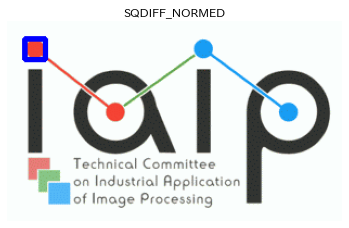

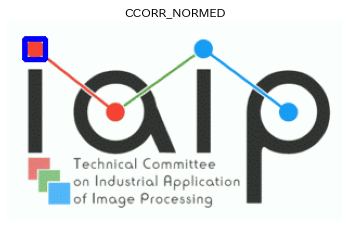

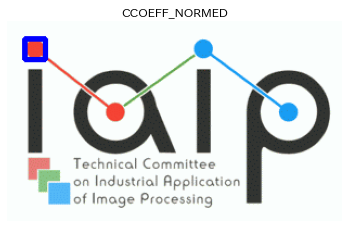

In [27]:
dst = cimg.copy()
minval, maxval, minloc, maxloc = cv2.minMaxLoc(1-res_SQDIFF_N)
p2 = (maxloc[0]+template.shape[1], maxloc[1]+template.shape[0])
cv2.rectangle(dst,  maxloc, p2 , (255,0,0), 3)
plt.figure()
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

plt.title('SQDIFF_NORMED');
plt.axis(False);

dst = cimg.copy()
minval, maxval, minloc, maxloc = cv2.minMaxLoc(res_CCORR_N)
p2 = (maxloc[0]+template.shape[1], maxloc[1]+template.shape[0])
cv2.rectangle(dst,  maxloc, p2 , (255,0,0), 3)
plt.figure()
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('CCORR_NORMED');
plt.axis(False);

dst = cimg.copy()
minval, maxval, minloc, maxloc = cv2.minMaxLoc(res_CCOEFF_N)
p2 = (maxloc[0]+template.shape[1], maxloc[1]+template.shape[0])
cv2.rectangle(dst,  maxloc, p2 , (255,0,0), 3)
plt.figure()
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('CCOEFF_NORMED');
plt.axis(False);


## 3.6 特徴量によるマッチング

ここではKAZE特徴量を使っている。ORB等のバイナリ特徴の場合はやりかたが若干異なる。
SIFT, SURF特徴量は2020年に特許が切れるのでOpenCV 4.4からはメインのmoduleに組込まれ，同じ方法で使えるようになる筈。

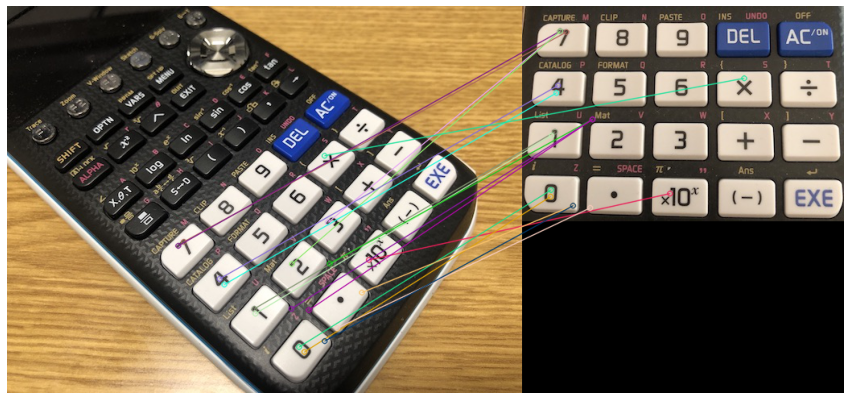

In [29]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 15.0)
cimg = cv2.imread('Calc.jpg')
template = cv2.imread('Calc_s.jpg')
gimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)
gtemplate = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# detector/descriptorのインスタンス化
fdm = cv2.KAZE_create()
# 検出と算出
fp1, fd1 = fdm.detectAndCompute(gimg, None)
fp2, fd2 = fdm.detectAndCompute(gtemplate, None)
# マッチングの準備
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(fd1, fd2, k=2)
# 特徴空間で距離が近いものを選ぶ
good = []
for m,n in matches:
    if m.distance< 0.50*n.distance:
        good.append([m])
# マッチングの可視化
dst = cv2.drawMatchesKnn(cimg, fp1, template, fp2, good, None, flags=2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis(False);


ORBでのマッチングの例。バイナリ特徴量のためハミング距離を使う。

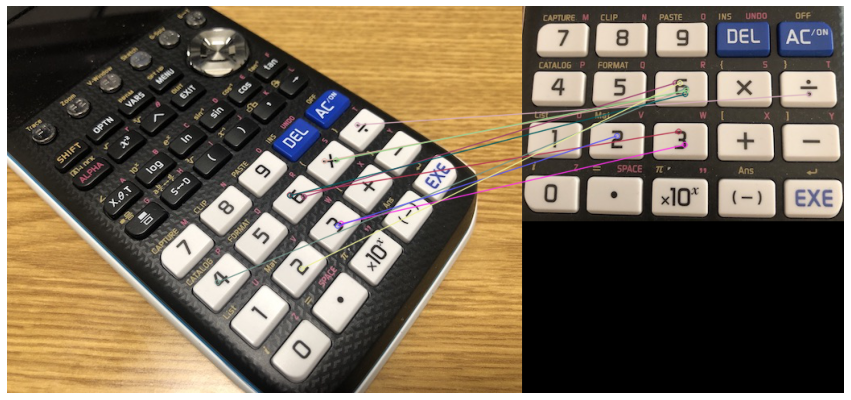

In [30]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 15.0)
cimg = cv2.imread('Calc.jpg')
template = cv2.imread('Calc_s.jpg')
gimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)
gtemplate = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# detector/descriptorのインスタンス化
fdm = cv2.ORB_create()
# 検出と算出
fp1, fd1 = fdm.detectAndCompute(gimg, None)
fp2, fd2 = fdm.detectAndCompute(gtemplate, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# マッチングの準備
matches = bf.match(fd1, fd2)
# 特徴空間で距離が近い順にソート
matches = sorted(matches, key=lambda x:x.distance)
# マッチングの可視化
dst = cv2.drawMatches(cimg, fp1, template, fp2, matches[:10], None, flags=2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis(False);


## 3.8 Hough変換
(画像処理100本ノック Q. 44-46)

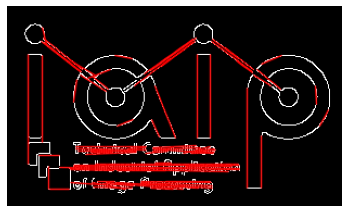

In [32]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
gimg = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(gimg, threshold1=100, threshold2=200,apertureSize=3)
lines = cv2.HoughLinesP(edge, 1.0, np.pi/180.0, threshold=10, minLineLength=15, maxLineGap=5)
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
for l in lines:
    pt1 = (l[0][0], l[0][1])
    pt2 = (l[0][2], l[0][3])
    cv2.line(dst, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis(False);
